# keras 사용법

## 이미지(mnist) 다운 받기
- train : 60000개
- test : 10000개

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print("train 개수:",train_images.shape[0])
print("test 개수:",test_images.shape[0])

train 개수: 60000
test 개수: 10000


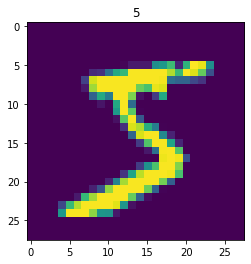

In [5]:
plt.imshow(train_images[0])
plt.title(train_labels[0])
plt.show()

## model 만들기

In [6]:
from tensorflow.keras import models, layers

sequential: 모델은 레이어를 선형으로 연결하여 구성

In [7]:
network = models.Sequential()

In [8]:
network.add(layers.Dense(512,activation='relu',input_shape=(784,)))

In [9]:
network.add(layers.Dense(10,activation='softmax'))

In [10]:
print("parameter(weight)개수")
for i in range(4):
    print(network.weights[i].shape)

parameter(weight)개수
(784, 512)
(512,)
(512, 10)
(10,)


## gradient descent

In [11]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## scalinge & normalization

In [12]:
train_images = train_images.reshape([-1,28*28])

In [13]:
train_images = train_images.astype('float32')/255

In [14]:
train_images.dtype

dtype('float32')

In [15]:
test_images = test_images.reshape([-1,28*28])
test_images = test_images.astype('float32')/255

In [16]:
test_images.dtype

dtype('float32')

## One Hot Encoding

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Training

In [19]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2575 - accuracy: 0.9250
Epoch 2/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1055 - accuracy: 0.9686
Epoch 3/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0701 - accuracy: 0.9785
Epoch 4/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0516 - accuracy: 0.9843
Epoch 5/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0391 - accuracy: 0.9881


In [20]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.0671 - accuracy: 0.9798


In [21]:
print('test_acc:',test_acc)

test_acc: 0.9798


In [22]:
a = network(test_images[0].reshape(-1,784))

In [23]:
test_images[0].shape

(784,)

In [24]:
test_images[10:100]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

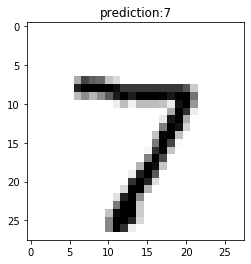

In [25]:
plt.imshow(test_images[0].reshape(28,28),cmap=plt.cm.binary)
plt.title("prediction:"+str(np.argmax(a.numpy())))
plt.show()

## relu 계산

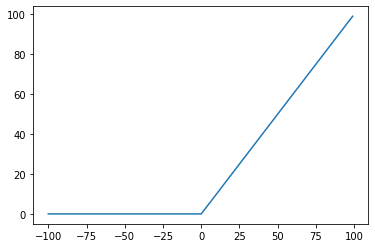

In [26]:
z = np.arange(-100,100)
relu = np.maximum(z,0)
plt.plot(z,relu)
plt.show()

In [27]:
x = np.random.random((64,3,32,10)) # (64,3,32,10)
y = np.random.random((32,10)) # (32,10)

In [28]:
x[0,0,:,:]

array([[0.50506883, 0.24232166, 0.39569991, 0.98671613, 0.25086072,
        0.93542728, 0.08010507, 0.30287179, 0.22995758, 0.99256496],
       [0.88940446, 0.11310396, 0.00414967, 0.39101242, 0.82215817,
        0.65215013, 0.68372765, 0.34458083, 0.35780985, 0.00295803],
       [0.50459315, 0.6445991 , 0.2327218 , 0.05038876, 0.19448196,
        0.0899275 , 0.82144173, 0.97368683, 0.7815628 , 0.67006136],
       [0.1487072 , 0.47463565, 0.70017717, 0.24033688, 0.06194771,
        0.66353347, 0.63759528, 0.2034074 , 0.99836225, 0.92974447],
       [0.9802885 , 0.48883746, 0.29356719, 0.18337155, 0.86631624,
        0.42779741, 0.4482998 , 0.26954387, 0.6708601 , 0.78205829],
       [0.16768702, 0.78498614, 0.00896623, 0.62852049, 0.19024737,
        0.6748323 , 0.54541128, 0.6009337 , 0.54270117, 0.22356798],
       [0.52241387, 0.90438032, 0.82774926, 0.53543458, 0.82927585,
        0.26424732, 0.8856214 , 0.48812411, 0.63012577, 0.97296584],
       [0.17897139, 0.46582837, 0.1029135

In [29]:
z = np.maximum(x,y)

In [30]:
z

array([[[[0.81691748, 0.7749738 , 0.82629232, ..., 0.98681987,
          0.22995758, 0.99256496],
         [0.88940446, 0.46651735, 0.55983169, ..., 0.34458083,
          0.86993525, 0.63363756],
         [0.50459315, 0.67384028, 0.68235218, ..., 0.97368683,
          0.7815628 , 0.67006136],
         ...,
         [0.99967938, 0.63685587, 0.8602342 , ..., 0.51067451,
          0.13632557, 0.88330911],
         [0.43832987, 0.87033841, 0.8686887 , ..., 0.85576072,
          0.26516268, 0.64992442],
         [0.35012841, 0.1875768 , 0.47762165, ..., 0.52044166,
          0.50185221, 0.58033303]],

        [[0.81691748, 0.80914907, 0.89798202, ..., 0.98681987,
          0.44743382, 0.95656156],
         [0.71370918, 0.54614124, 0.57928321, ..., 0.68051263,
          0.86993525, 0.63363756],
         [0.25397081, 0.79623905, 0.82548684, ..., 0.96753502,
          0.75591072, 0.60454373],
         ...,
         [0.99967938, 0.63685587, 0.8602342 , ..., 0.31445428,
          0.84822423, 0.9

## SGB
- Stochastic Gradient Descent
- primitive(Base) Gradient Descent
- The stochastic regers to the fact that **each batch of data is drwan at random**.
- batch 크기 만큼 무작위로 뽑는걸 많이 수행하면 결국 모든 데이터를 뽑아낼 수 있는 확률이 높아진다.

# Overfitting
- the fact that machine-learning models tend to perfrom worse on new data than on their training data.

**IMDB** : Classifying movie reviews as positive or negative(binary classfication)<br>
**Reuters** : Classifying news wires by topic(multiclass classification)<br>
**Bonston Housing** : Estimating the price of a house, given real-estate data(regression)<br>

## IMID
- Two-class classification, or binary classification - classfity movie review as posivive or negative, based on the text content of the reviews
- 50000개(train, test로 안나뉨)
- train, test로 나누어주어야 한다.
- IMDB dataset the reviews (sequences of words) into sequences of integers
- 단어는 대문자가 아닌 소문자로 되어있음.

In [1]:
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np
import random

### num_words=5000
- 5,000 most frequently occurring words in thr training data

In [2]:
num_words = 5000

In [3]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/imdb.npz",num_words=num_words)

In [4]:
print("추출한 단어 인덱스의 범위: 0 ~",max([max(sequence) for sequence in train_data]))

추출한 단어 인덱스의 범위: 0 ~ 4999


In [5]:
total_train_size = len(train_data)
total_test_size = len(test_data)
print("train데이터 개수:",total_train_size)
print("test데이터 개수:",total_test_size)

train데이터 개수: 25000
test데이터 개수: 25000


In [6]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

### 0 stands for negative and 1 stands for positive

In [7]:
evaluate = {0:"negative",1:"positive"}

### processing_word_index

In [8]:
word_index = imdb.get_word_index()

In [9]:
print("전체 단어 인덱스의 개수:",len(word_index))

전체 단어 인덱스의 개수: 88584


In [10]:
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()]
)

train_data의 처음 인덱스인 0, 1, 2는 패딩, 문서 시작, 사전에 없음을 위한 인덱스이므로 3을 빼서 출력해야한다.

In [11]:
num = random.randint(0,total_train_size-1)
decode_review = ' '.join(
    [reverse_word_index.get(i-3, "") for i in train_data[num]]
)

0, 1, 2는 공백으로 처리

In [12]:
print(decode_review)
print("")
print("label=",evaluate[train_labels[num]])

 after finally viewing this movie in its  i am completely  by the  it has received by critics and online  alike is it the worst western ever no i wouldn't say that but the last great american western a  i saw  to it more than once not even close br br a movie that tries to tell a story like this needs believable characters that speak believable dialogue and the dialogue in this film is among the most  and clichéd that i've ever seen the movie can be  in  per minute as in how many times is an actor or actress forced by the script to say something that no human being would say in real life there's so many  of this that it's distracting cheesy lines come at you in waves predictable unoriginal and often br br if bad dialogue doesn't bother you then how about bad  few westerns can show you  that's completely unbelievable while desperately trying to make you take the action seriously it's okay if there's a comic edge to such  such as in  but in  the very staged and very stiff choreography of

## Preparing the data

### 개선점
results[i,] = 1. 으로만 하면 한 원소의 특징이 모두 1로 바뀌어 문제가 생긴다. <br>
그러므로 results[i][sequence]으로 바꾸어 특정 원소만 1로 바꾸어 준다.

In [350]:
def vectorize_sequences(sequences, dimension= 10000):
    results = np.zeros((len (sequences), dimension))
    print("데이터 형태:",results.shape)
    for i , sequence in enumerate(sequences):
        results[i][sequence] = 1.
    return results

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

데이터 형태: (25000, 10000)
데이터 형태: (25000, 10000)


In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Data Analysis

### train_data positive 데이터 negative 데이터 분석

Text(0.5, 1.0, 'negative')

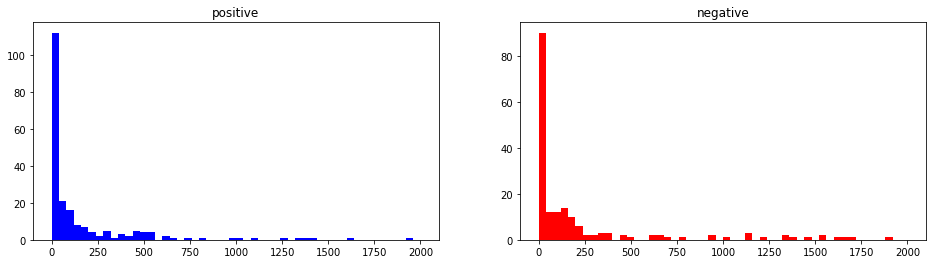

In [19]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(train_data[0],color="blue",bins=50,range=(0,2000))
plt.title(str(evaluate[train_labels[0]]))

plt.subplot(1,2,2)
plt.hist(train_data[1],color="red",bins=50, range=(0,2000))
plt.title(str(evaluate[train_labels[1]]))

위의 그래프를 보면 0에서부터 뒤로 갈수로 분포가 줄어 드는 것을 알 수 있다.<br>
인덱스 숫자가 작을수록 많이 분포한다는 것을 알수 있다.

사실 위에 있는 히스토그램만을 본다고 무슨 차이가 있는지 파악하긴 어렵다.
하지만 예측 한건데 부정적인 리뷰는 부정적인 단어가 많이 들어 있을 것이다. 예를들어 not, no, never, didn't,worst등의 부정적 단어가 포함 될 가능 성이 높다. 따라서 머신은 이러한 단어가 있을시 negative에 영향을 줄 weight의 값을 크게 변화시킨다.

### train_data[1] 리뷰 분석하기

In [20]:
# 부정적인 단어의 인덱스번호
negative_word = [21, 24, 57, 78, 115, 152, 161, 164, 191, 249, 357, 394, 1179, 1905, 4373]
for i in negative_word:
    print(reverse_word_index.get(i-3))

but
not
no
bad
never
doesn't
didn't
nothing
can't
worst
boring
terrible
slasher
terribly
trashy


In [21]:
num = 1

In [22]:
decode_review = ' '.join(
    [reverse_word_index.get(i-3, "") for i in train_data[num]]
)
print(decode_review)
print("")
print("label=",evaluate[train_labels[num]])

 big hair big  bad music and a giant safety  these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an  the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are  and funny in equal  the hair is big lots of   men wear those cut   that show off their   that men actually wore them and the music is just  trash that plays over and over again in almost every scene there is trashy music  and  taking away bodies and the  still doesn't close for  all  aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then

label= negative


위의 리뷰는 negative한 리뷰이다. 이제부터 여기서 부정적인 단어가 있는지 살펴보겠다.

### x_train[1] 분석

x_train[0]에서 1의 개수: 114
x_train[0]의 평가: negative


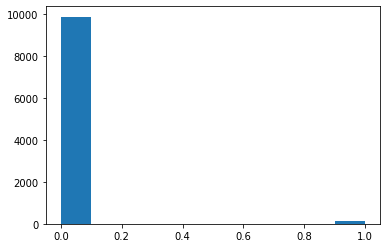

In [23]:
plt.hist(x_train[num])
count = 0
index_value = []
for i in range(len(x_train[num])):
    if(x_train[num][i]==1):
        count +=1
        index_value.append(i)

print("x_train[0]에서 1의 개수:",count)
print("x_train[0]의 평가:",evaluate[y_train[num]])
plt.show()

In [24]:
print("부정적인 단어의 포함 여부")
for i in index_value:
    for j in negative_word:
        if(i == j):
            print(reverse_word_index.get(i-3))

부정적인 단어의 포함 여부
but
bad
doesn't
worst
terrible
terribly
trashy


부정적인 단어가 7개가 나왔다. 머신은 이 단어들을 기반으로 negative로 판단 했을 수도 있다.

## Building yourt network

In [34]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [43]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

In [70]:
model = models.Sequential()

In [71]:
model.add(layers.Dense(5000,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [72]:
print("parameter(weight)개수")
for i in range(len(model.weights)):
    print(model.weights[i].shape)

parameter(weight)개수
(10000, 5000)
(5000,)
(5000, 1000)
(1000,)
(1000, 100)
(100,)
(100, 1)
(1,)


weight가 많다고 좋은 것은 아니다. 학습할 변수가 많으면 컴퓨터가 처리하기 어렵고, 그만큼 오래동안 학습해야 한다. 너무 많은 변수로 인해 데이터의 양상을 파악하기 어려워진다.

### Activation Function
**Sigmoid 함수**
$${sigmoid(x) = {1\over{1+e^{-x}}}}$$

**Relu 함수**
$${relu(x) = max(0,x)}$$

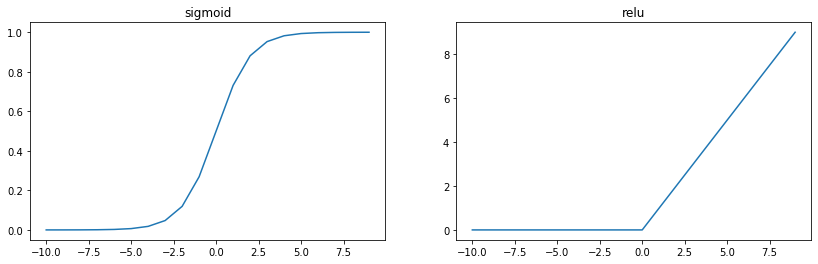

In [119]:
x = np.arange(-10,10)
sigmoid = 1/(1+np.exp(-x))
relu = np.maximum(x,0)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title('sigmoid')
plt.plot(x,sigmoid)
plt.subplot(1,2,2)
plt.title('relu')
plt.plot(x,relu)
plt.show()

### Compiling the model
- Rmsprop -> Adam
- learning_rage = 0.001
- loss : binary_crossentroy
- 분류가 2개일 경우(2개일 경우, softmax보단 sigmoid가 더 낮다.)
$${J(w)=-{1\over m}\sum^m_{i=1} [y^{(i)}log(\sigma(w^T*\mathbf x))+(1-y^{(i)})log(1-\sigma(w^T*\mathbf x))]}$$

In [75]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy']
)

Adam Optimization는 momentam Optimization와 RMSProp를 합친 옵티마이저이다. 현재 가장 많이 쓰이는 옵티마이저이다. 

In [76]:
history = model.fit(partial_x_train,
                   partial_y_train,epochs=10,batch_size=250,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 23s 2ms/sample - loss: 0.3864 - accuracy: 0.8252 - val_loss: 0.2846 - val_accuracy: 0.8815
Epoch 2/10
15000/15000 [==============================] - 23s 2ms/sample - loss: 0.1365 - accuracy: 0.9518 - val_loss: 0.3222 - val_accuracy: 0.8774
Epoch 3/10
15000/15000 [==============================] - 23s 2ms/sample - loss: 0.0255 - accuracy: 0.9927 - val_loss: 0.4519 - val_accuracy: 0.8678
Epoch 4/10
15000/15000 [==============================] - 23s 2ms/sample - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.6524 - val_accuracy: 0.8722
Epoch 5/10
15000/15000 [==============================] - 23s 2ms/sample - loss: 3.8754e-04 - accuracy: 1.0000 - val_loss: 0.7240 - val_accuracy: 0.8718
Epoch 6/10
15000/15000 [==============================] - 23s 2ms/sample - loss: 6.9880e-05 - accuracy: 1.0000 - val_loss: 0.7675 - val_accuracy: 0.8712
Epoch 7/10
15000/15000 [========================

In [77]:
history_dict = history.history

history_dict.keys()

loss_values = history_dict['loss']

accuracy = history_dict['accuracy']

val_loss = history_dict['val_loss']

val_accuracy = history_dict['val_accuracy']

epochs = np.arange(1,len(val_loss)+1)

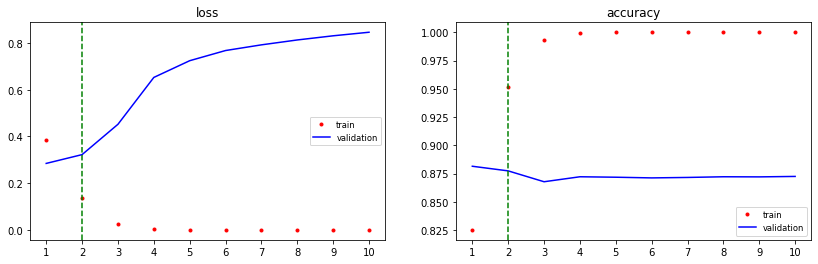

In [78]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("loss")
plt.plot(epochs,loss_values,".r", label='train',)
plt.plot(epochs,val_loss,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)

plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(epochs,accuracy,".r", label='train')
plt.plot(epochs,val_accuracy,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)
plt.show()

위 loss그래프를 보면 epoch를 2 이상하면 train_date로 OverFitting 과하게 되어서 val_loss가 올라가는 것을 알 수 있다. 
위 accuracy그래프 보면 accuracy가 1로 너무 OverFitting 된것이 보인다. 반대로 val_accuracy는 epoch를 돌리더라도 약간 내려간거 빼고 큰 변화가 일어나지 않는다. 
따라서 epoch는 2만 하는 것이 좋을 것 같다.

### Testing

In [101]:
result = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 14s 579us/sample - loss: 0.3612 - accuracy: 0.8661


In [102]:
print("loss",results[0])
print("accuracy",results[1])

loss 0.3611930773115158
accuracy 0.86608


### Retraining a model from scratch

In [110]:
model = models.Sequential()

In [111]:
model.add(layers.Dense(5000,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [112]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy']
)

In [113]:
history = model.fit(partial_x_train,
                   partial_y_train,epochs=2,batch_size=1000,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 15s 1ms/sample - loss: 0.6089 - accuracy: 0.6849 - val_loss: 0.3399 - val_accuracy: 0.8608
Epoch 2/2
15000/15000 [==============================] - 15s 982us/sample - loss: 0.2468 - accuracy: 0.9063 - val_loss: 0.3019 - val_accuracy: 0.8813


In [114]:
history_dict = history.history

history_dict.keys()

loss_values = history_dict['loss']

accuracy = history_dict['accuracy']

val_loss = history_dict['val_loss']

val_accuracy = history_dict['val_accuracy']

epochs = np.arange(1,len(val_loss)+1)

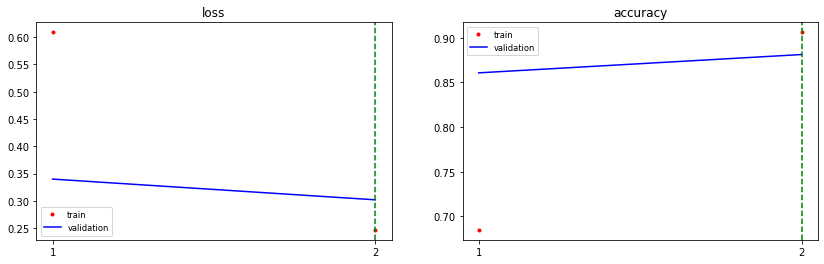

In [115]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("loss")
plt.plot(epochs,loss_values,".r", label='train',)
plt.plot(epochs,val_loss,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)

plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(epochs,accuracy,".r", label='train')
plt.plot(epochs,val_accuracy,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)
plt.show()
plt.show()

In [116]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 15s 601us/sample - loss: 0.3124 - accuracy: 0.8780


In [117]:
print("loss",results[0])
print("accuracy",results[1])

loss 0.31240996218681333
accuracy 0.87804


아까보다 accuracy가 0.1정도 더 올랐다. 확실치 않지만, 이번에 나온 accuracy과 loss의 최대값이다. 모델에서 오를 수 있는 최대의 값이다. 지금 나온 accuracy값이 나쁘지는 않지만 accuracy를 더 높이기 위해서는 이 모델보다 더 좋은 모델을 사용해야 한다. Fully Connected Layer만으로 시계열데이터를 학습하는 데 다소 무리일 수 있다. 그래서 주로 이러한 시계열 데이터는 RNN에서 효과를 발휘한다.

In [118]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 5000)              50005000  
_________________________________________________________________
dense_33 (Dense)             (None, 1000)              5001000   
_________________________________________________________________
dense_34 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 101       
Total params: 55,106,201
Trainable params: 55,106,201
Non-trainable params: 0
_________________________________________________________________


## IMDB사이트 에서 가져온 리뷰 데이터로 직접 예측해보기
- 영화 이름: Fantasy Island
- 리뷰 라벨: negative
- https://www.imdb.com/title/tt0983946/reviews?ref_=tt_ov_rt
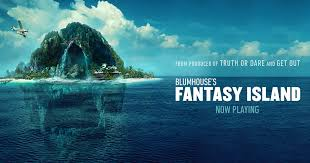

In [384]:
IMBD_review = "bad movie bad movie go to your room forever i don't know where to start the convoluted attempt at anything close to a plot the juvenile writing the bad acting all around the movie should not have been called fantasy island it should have been called clue cause no one involved had one "+"however i do credit it for a first in the life as in the first time we in the audience had a conversation with show of hands just how bad an experience this was a horribly disfigured baby "+"please spare yourself don't watch it it's too late for me but if i spared just one of you maybe my sacrifice is worth it"

In [385]:
IMBD_review_list = [] 

In [386]:
for i in IMBD_review.split():
    IMBD_review_list.append(word_index[i]+3)
IMBD_review_list.remove(11085) # 인덱스 5000을 넘어 가는 단어 제거
IMBD_review_list.remove(11745)

In [387]:
decode_review = ' '.join(
    [reverse_word_index.get(i-3, "") for i in IMBD_review_list]
)
print(decode_review)
print("")
print("label=","negative")

bad movie bad movie go to your room forever i don't know where to start the convoluted attempt at anything close to a plot the juvenile writing the bad acting all around the movie should not have been called fantasy island it should have been called clue cause no one involved had one however i do credit it for a first in the life as in the first time we in the audience had a conversation with show of hands just how bad an experience this was a horribly baby please spare yourself don't watch it it's too late for me but if i just one of you maybe my sacrifice is worth it

label= negative


In [388]:
IMDB_review_data = np.reshape(IMBD_review_list,(1,len(IMBD_review_list)))
print("형태:",IMDB_review_data.shape)

형태: (1, 114)


In [389]:
IMDB_review_data = vectorize_sequences(IMDB_review_data)

1
데이터 형태: (1, 10000)


In [390]:
IMDB_review_data[0,:100]

array([0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [405]:
predict = model.predict(IMDB_review_data)[0,0]
print("리뷰에 대한 postive일 확률이",predict,"이다. 따라서 머신은 이 리뷰에 대해",evaluate[int(model.predict(IMDB_review_data))],"라고 예측한다.")

리뷰에 대한 postive일 확률이 0.018389165 이다. 따라서 머신은 이 리뷰에 대해 negative 라고 예측한다.


# Reuters
- classify Reuters newswires into 46 mutually exclusive topics- multi-class classification.
- 46 different topics each topic has at least 10 examples in the training set.

In [134]:
import numpy as np

In [135]:
from tensorflow.keras.datasets.reuters import load_data
from tensorflow.keras.datasets import reuters

In [136]:
word_index = reuters.get_word_index()

In [137]:
print("단어의 개수:",len(word_index))

단어의 개수: 30979


In [138]:
num_words = 10000

In [139]:
(train_datas, train_labels),(test_datas, test_labels) = load_data(num_words=num_words)

In [140]:
print("train 개수:",len(train_datas))
print("test 개수:",len(test_datas))

train 개수: 8982
test 개수: 2246


In [141]:
print("추출한 인덱스의 개수: 0 ~",max([max(sequence) for sequence in train_datas]))

추출한 인덱스의 개수: 0 ~ 9999


In [142]:
word_index = reuters.get_word_index()

In [143]:
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()]
)

In [144]:
decode_newsswire = ' '.join(
    [reverse_word_index.get(i-3, "") for i in train_datas[0]]
)
print(decode_newsswire)

   said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [145]:
train_datas[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [146]:
train_labels[0]

3

In [147]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),num_words))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [148]:
x_trains = vectorize_sequences(train_datas)
x_tests = vectorize_sequences(test_datas)

In [149]:
def to_one_hot(labels,dimesinon = 46):
    results = np.zeros((len(labels),dimesinon))
    for i, label in enumerate(labels):
        results[i,label] = 1.
    return results

In [173]:
onehot_train_labels = to_one_hot(train_labels)
onehot_text_labesls = to_one_hot(test_labels)

In [178]:
onehot_text_labesls[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [177]:
test_labels[1]

10

## Building Model

In [182]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras

In [183]:
model = models.Sequential()

In [184]:
model.add(layers.Dense(1000,activation='relu',input_shape=(num_words,)))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(46,activation="softmax"))

In [185]:
print("weight의 개수")
for i in range(len(model.weights)):
    print(model.weights[i].shape)

weight의 개수
(10000, 1000)
(1000,)
(1000, 100)
(100,)
(100, 46)
(46,)


In [186]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [187]:
x_val = x_trains[:1000]
partial_x_train = x_trains[1000:]
y_val = onehot_train_labels[:1000]
partial_y_train = onehot_train_labels[1000:]

In [188]:
history = model.fit(partial_x_train,partial_y_train,batch_size=160,
                    epochs=20,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 407us/sample - loss: 1.6354 - accuracy: 0.6741 - val_loss: 0.9790 - val_accuracy: 0.8050
Epoch 2/20
7982/7982 [==============================] - 3s 377us/sample - loss: 0.5377 - accuracy: 0.8857 - val_loss: 0.8474 - val_accuracy: 0.8190
Epoch 3/20
7982/7982 [==============================] - 3s 366us/sample - loss: 0.2678 - accuracy: 0.9390 - val_loss: 0.8677 - val_accuracy: 0.8080
Epoch 4/20
7982/7982 [==============================] - 3s 383us/sample - loss: 0.1968 - accuracy: 0.9493 - val_loss: 0.8801 - val_accuracy: 0.8210
Epoch 5/20
7982/7982 [==============================] - 3s 377us/sample - loss: 0.1657 - accuracy: 0.9544 - val_loss: 0.8901 - val_accuracy: 0.8190
Epoch 6/20
7982/7982 [==============================] - 3s 357us/sample - loss: 0.1483 - accuracy: 0.9546 - val_loss: 0.9186 - val_accuracy: 0.8170
Epoch 7/20
7982/7982 [==============================] - 3s 370us

In [191]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [192]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

In [193]:
import matplotlib.pyplot as plt

In [211]:
epochs = np.arange(1,len(val_loss)+1)

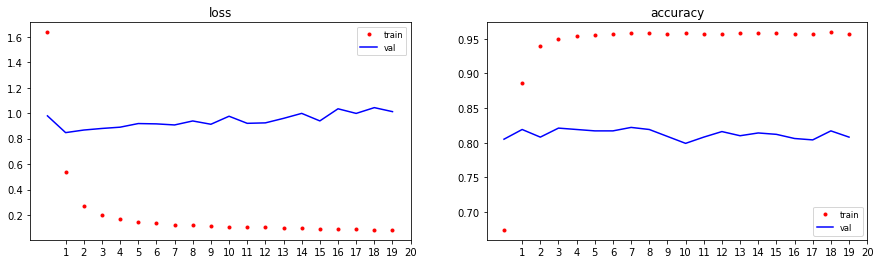

In [212]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("loss")
plt.plot(loss,".r",label="train")
plt.plot(val_loss,"-b",label="val")
plt.legend(fontsize='small')
plt.xticks(epochs)

plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(accuracy,".r",label="train")
plt.plot(val_accuracy,"-b",label="val")
plt.legend(fontsize='small')
plt.xticks(epochs)
plt.show()

In [207]:
results = model.evaluate(x_tests,onehot_text_labesls)

2246/2246 [==============================] - 0s 205us/sample - loss: 1.1595 - accuracy: 0.7952


In [209]:
print("loss:",results[0])
print("accuracy:",results[1])

loss: 1.1595049360874818
accuracy: 0.79519147


In [263]:
model = models.Sequential()

In [264]:
model.add(layers.Dense(1000,activation='relu',input_shape=(num_words,)))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(46,activation="softmax"))

In [265]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00003),
              loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [266]:
history = model.fit(partial_x_train,partial_y_train,batch_size=100,
                    epochs=40,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/40
7982/7982 [==============================] - 5s 564us/sample - loss: 3.4167 - accuracy: 0.3814 - val_loss: 2.9461 - val_accuracy: 0.4840
Epoch 2/40
7982/7982 [==============================] - 4s 516us/sample - loss: 2.5308 - accuracy: 0.5324 - val_loss: 2.1881 - val_accuracy: 0.5500
Epoch 3/40
7982/7982 [==============================] - 4s 519us/sample - loss: 1.9090 - accuracy: 0.5958 - val_loss: 1.7542 - val_accuracy: 0.6290
Epoch 4/40
7982/7982 [==============================] - 4s 517us/sample - loss: 1.5496 - accuracy: 0.6709 - val_loss: 1.5138 - val_accuracy: 0.6570
Epoch 5/40
7982/7982 [==============================] - 4s 521us/sample - loss: 1.3217 - accuracy: 0.7111 - val_loss: 1.3611 - val_accuracy: 0.6890
Epoch 6/40
7982/7982 [==============================] - 4s 526us/sample - loss: 1.1605 - accuracy: 0.7513 - val_loss: 1.2616 - val_accuracy: 0.7320
Epoch 7/40
7982/7982 [==============================] - 4s 532us

In [267]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

In [268]:
epochs = np.arange(1,len(val_loss)+1)

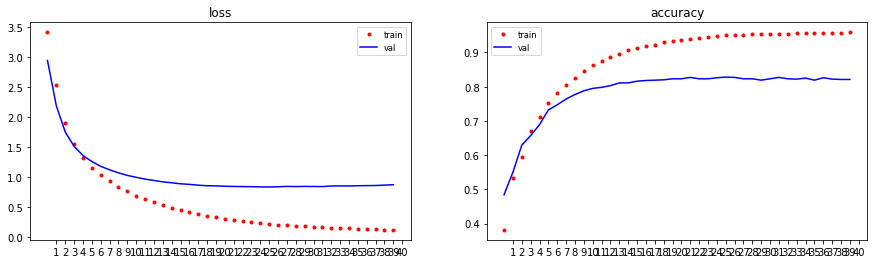

In [269]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("loss")
plt.plot(loss,".r",label="train")
plt.plot(val_loss,"-b",label="val")
plt.legend(fontsize='small')
plt.xticks(epochs)

plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(accuracy,".r",label="train")
plt.plot(val_accuracy,"-b",label="val")
plt.legend(fontsize='small')
plt.xticks(epochs)
plt.show()

In [270]:
results = model.evaluate(x_tests,onehot_text_labesls)

2246/2246 [==============================] - 0s 204us/sample - loss: 0.9714 - accuracy: 0.7965
